Dataset: 2017 Boston Marathon results for 2017

#1. Choose one variable and plot that variable four different ways.


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
sns.set(style="whitegrid")

In [49]:
df = pd.read_csv("marathon_results_2017.csv")
df = df.drop('Unnamed: 0',1)
df = df.drop('Unnamed: 9',1)

In [52]:
df['pace_times'] = pd.to_datetime(df['Pace'].str.strip(), format='%H:%M:%S')

0   1900-01-01 00:04:57
1   1900-01-01 00:04:58
2   1900-01-01 00:04:59
3   1900-01-01 00:05:03
4   1900-01-01 00:05:04
Name: pace_times, dtype: datetime64[ns]

In [53]:
df['pace_mins'] = [(t.second + t.minute * 60 + t.hour *3600) / 60 for t in df['pace_times']]
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,pace_times,pace_mins
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,0:15:25,0:30:28,...,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1,1900-01-01 00:04:57,4.950000
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,0:15:24,0:30:27,...,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2,1900-01-01 00:04:58,4.966667
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,0:15:25,0:30:29,...,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3,1900-01-01 00:04:59,4.983333
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,0:15:25,0:30:29,...,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4,1900-01-01 00:05:03,5.050000
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,0:15:25,0:30:28,...,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5,1900-01-01 00:05:04,5.066667


C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


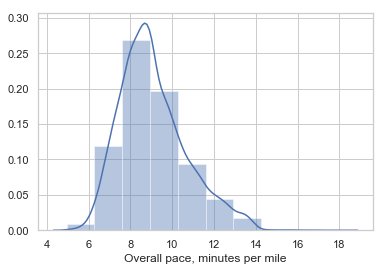

In [54]:
z = pd.Series(df['pace_mins'], name = 'Overall pace, minutes per mile')
sns.distplot(z, bins=10)

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


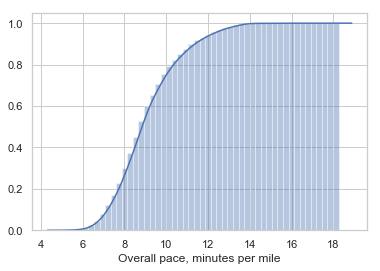

In [55]:
sns.distplot(z,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

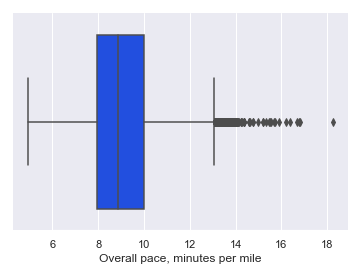

In [56]:
sns.set(style="darkgrid", palette='bright')
sns.boxplot(x=z)
sns.despine(trim=True)

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


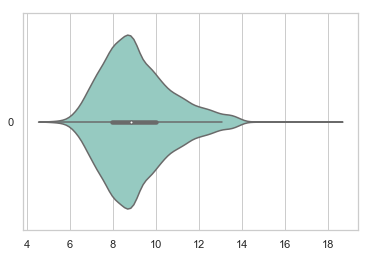

In [57]:
z = pd.Series(df['pace_mins'], name = 'Overall pace, minutes per mile')
sns.set(style='whitegrid')
sns.violinplot(data=z, palette="Set3", orient="h")

#2. Choose two continuous variables, and plot them three different ways.


In [58]:
x = pd.Series(df['pace_mins'], name = 'Overall pace, minutes per mile')
y = pd.Series(df['Age'], name = 'Runner Age')

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


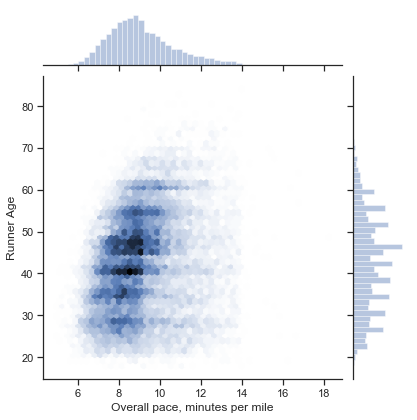

In [59]:
sns.set(style='ticks')
sns.jointplot(x,y,kind="hex")

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


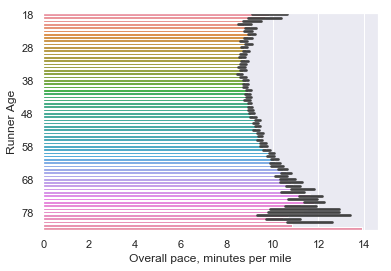

In [85]:
init = 18
axes = [init]
for i in range(7):
    axes = axes + list(np.repeat("", 9))
    init = init + 10
    axes.append(init)

sns.set(style='darkgrid',palette='bright')
ax = sns.barplot(x, y, orient="h")
ax.set(yticklabels=axes)
plt.show()

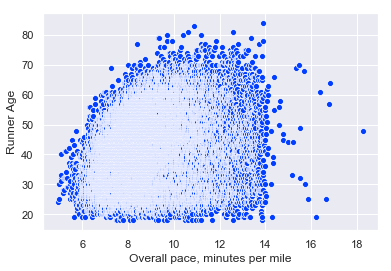

In [61]:
sns.set(style='darkgrid',palette='bright')
sns.scatterplot(x,y)

#3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [68]:
x = pd.Series(df['pace_mins'], name = 'Overall pace, minutes per mile')
y = pd.Series(df['Age'], name = 'Runner Age')
menpace = df.loc[(df['M/F'] == 'M'),'pace_mins']
menage = df.loc[(df['M/F'] == 'M'),'Age']

womenpace = df.loc[(df['M/F'] == 'F'),'pace_mins']
womenage = df.loc[(df['M/F'] == 'F'),'Age']

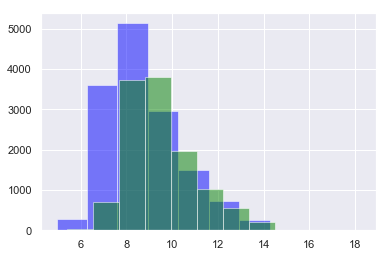

In [86]:
plt.hist(menpace, color='blue', alpha=.5, label='Men Marathon Pace')
plt.hist(womenpace, color='green', alpha=.5, label='Women Marathon Pace')
plt.show()

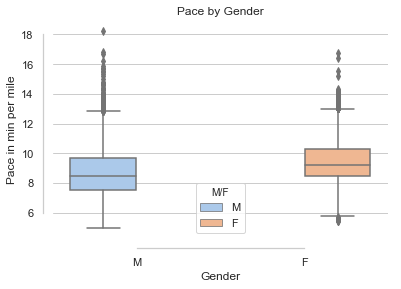

In [64]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='M/F',y='pace_mins',hue='M/F',data=df,palette='pastel')  
plt.title('Pace by Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Gender', ylabel='Pace in min per mile')
plt.show()

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


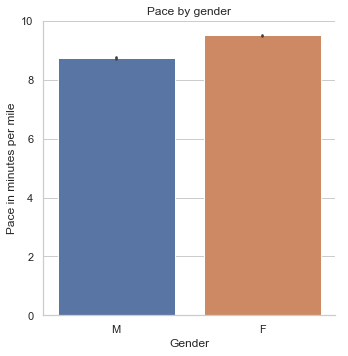

In [67]:
g = sns.factorplot(x="M/F", y="pace_mins", data=df, kind='bar')
g.set_ylabels("Pace in minutes per mile")
g.set_xlabels("Gender")
plt.title('Pace by gender')
plt.show()

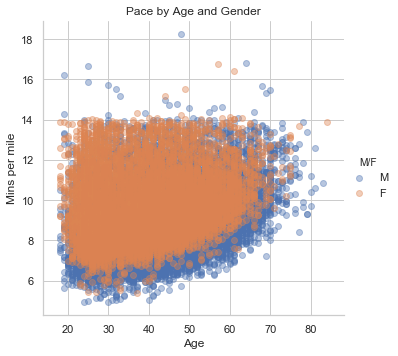

In [77]:
g = sns.lmplot(y='pace_mins', # Variable 1.
               x='Age', # Variable 2.
               hue='M/F',
               data=df,
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Mins per mile")
g.set_xlabels("Age")
plt.title('Pace by Age and Gender')
plt.show()

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


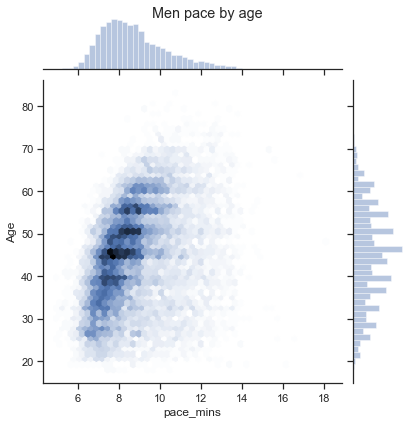

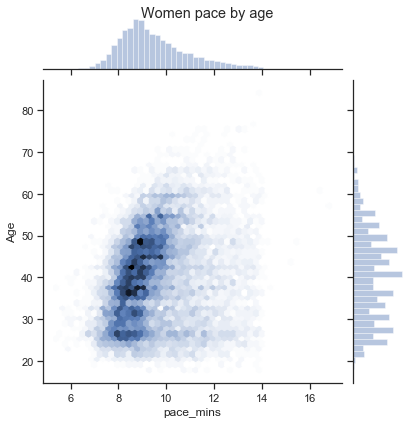

In [80]:
sns.set(style='ticks')
sns.jointplot(menpace,menage,kind="hex")
plt.suptitle('Men pace by age') 
plt.show()

sns.set(style='ticks')
sns.jointplot(womenpace,womenage,kind="hex")
plt.suptitle('Women pace by age')
plt.show()

C:\Users\ped54343\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


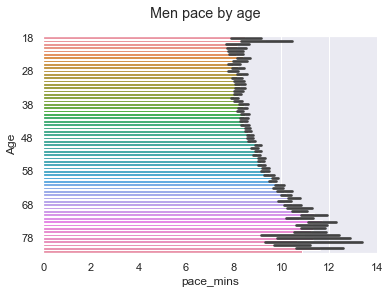

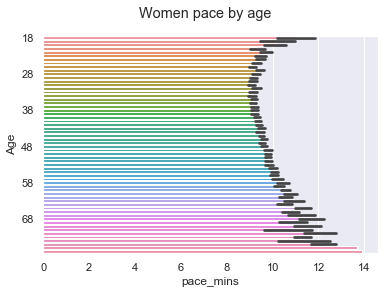

In [84]:
init = 18
axes = [init]
for i in range(7):
    axes = axes + list(np.repeat("", 9))
    init = init + 10
    axes.append(init)

sns.set(style='darkgrid',palette='bright')
ax = sns.barplot(menpace, menage, orient="h")
plt.suptitle('Men pace by age')
ax.set(yticklabels=axes)
plt.show()

sns.set(style='darkgrid',palette='bright')
ax = sns.barplot(womenpace, womenage, orient="h")
plt.suptitle('Women pace by age')
ax.set(yticklabels=axes)
plt.show()